In [1]:
import pandas as pd

# making data frame from csv file
df = pd.read_csv("../../data/ofr20181053_table1.csv")
 
# retrieving row by loc method
first = df.loc[0]
second = df.loc[1]

print(first, "\n\n", second)

Station                                    B-14
X, in feet1                             2346679
Y, in feet1                              251644
Change in gravity (∆G), in milliGals     2.2839
Name: 0, dtype: object 

 Station                                    B-15
X, in feet1                             2330512
Y, in feet1                              241483
Change in gravity (∆G), in milliGals    37.4472
Name: 1, dtype: object


In [2]:
print(df.head())

  Station  X, in feet1  Y, in feet1  Change in gravity (∆G), in milliGals
0    B-14      2346679       251644                              2.283900
1    B-15      2330512       241483                             37.447230
2    CER1      2358202       259877                              8.025276
3   CER15      2353877       260288                             -6.151253
4   COSO2      2330960       268320                              7.194520


In [3]:
import geopandas as gpd
from shapely.geometry import Point

# creating a geometry column 
geometry = [Point(xy) for xy in zip(df['X, in feet1'], df['Y, in feet1'])]

# Coordinate reference system : WGS84
crs = '+proj=lcc +lat_1=36 +lat_2=37.25 +lat_0=35.33333333333334 +lon_0=-119 +x_0=609601.2192024384 +y_0=0 +datum=NAD27 +units=us-ft +no_defs'

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

In [4]:
print(gdf.head())

  Station  X, in feet1  Y, in feet1  Change in gravity (∆G), in milliGals  \
0    B-14      2346679       251644                              2.283900   
1    B-15      2330512       241483                             37.447230   
2    CER1      2358202       259877                              8.025276   
3   CER15      2353877       260288                             -6.151253   
4   COSO2      2330960       268320                              7.194520   

                 geometry  
0  POINT (2346679 251644)  
1  POINT (2330512 241483)  
2  POINT (2358202 259877)  
3  POINT (2353877 260288)  
4  POINT (2330960 268320)  


In [5]:
gdf = gdf.to_crs('+proj=utm +zone=11 +datum=WGS84')
print(gdf.head())

  Station  X, in feet1  Y, in feet1  Change in gravity (∆G), in milliGals  \
0    B-14      2346679       251644                              2.283900   
1    B-15      2330512       241483                             37.447230   
2    CER1      2358202       259877                              8.025276   
3   CER15      2353877       260288                             -6.151253   
4   COSO2      2330960       268320                              7.194520   

                                      geometry  
0  POINT (425331.1561310743 3986342.561657313)  
1  POINT (420342.0067203438 3983349.091962917)  
2  POINT (428893.4283535541 3988777.925269071)  
3  POINT (427578.4642187392 3988930.423427749)  
4  POINT (420647.6834405417 3991521.872500391)  


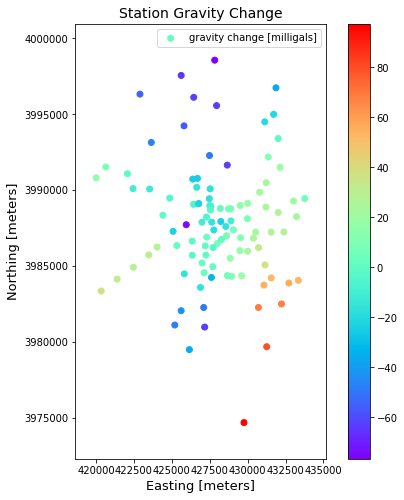

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors

# overall settings
fig, ax = plt.subplots(1, figsize=(8, 8))
ax = gdf.plot(column='Change in gravity (∆G), in milliGals', 
              cmap='rainbow', ax=ax, legend=True)

# label settings
plt.title("Station Gravity Change", fontsize=14)
plt.xlabel('Easting [meters]', fontsize=13)
plt.ylabel('Northing [meters]', fontsize=13)

# axis settings
ax.set_autoscaley_on(False)
ax.legend(['gravity change [milligals]'])

x_min = gdf.geometry.x.min()
x_max = gdf.geometry.x.max()
x_range = x_max - x_min

y_min = gdf.geometry.y.min()
y_max = gdf.geometry.y.max()
y_range = y_max - y_min

ax.set_xlim([x_min - x_range * 0.1, x_max + x_range * 0.1])
ax.set_ylim([y_min - y_range * 0.1, y_max + y_range * 0.1])

# y:x default is 1.0
#ax.set_aspect(0.5)

# point annotations
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['Station']):
    annot = ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")
    annot.set_visible(False)

# Problem: z size smaller than x * y (z size == x size == y size) Not 2D array
#z = pd.Series.to_numpy(gdf['Change in gravity (∆G), in milliGals'])
#z.reshape(gdf.geometry.x.size, gdf.geometry.y.size)
#plt.contour(z)
    
# save figure before showing
plt.savefig('../../resources/img/station_gravity_change.png', dpi=1080)
plt.show()

In [7]:
distances = {}
for i in range(gdf.geometry.size - 1):
    for j in range(i + 1, gdf.geometry.size):
        
        # station names
        point_a = gdf.loc[i]['Station']
        point_b = gdf.loc[j]['Station']
        
        # euclidean distance
        dist = gdf.geometry.iloc[i].distance(gdf.geometry.iloc[j])
        
        # symmetric so add both
        distances[point_a + " " + point_b] = dist
        distances[point_b + " " + point_a] = dist
        
print(distances)

{'B-14 B-15': 5818.2877768171675, 'B-15 B-14': 5818.2877768171675, 'B-14 CER1': 4315.180101516883, 'CER1 B-14': 4315.180101516883, 'B-14 CER15': 3427.4512664320446, 'CER15 B-14': 3427.4512664320446, 'B-14 COSO2': 6982.8487920181415, 'COSO2 B-14': 6982.8487920181415, 'B-14 COSO3': 4505.632032315512, 'COSO3 B-14': 4505.632032315512, 'B-14 CS1': 1307.0381255454452, 'CS1 B-14': 1307.0381255454452, 'B-14 CS10': 5387.184183505246, 'CS10 B-14': 5387.184183505246, 'B-14 CS11': 5949.5848714979975, 'CS11 B-14': 5949.5848714979975, 'B-14 CS12': 6308.528779912256, 'CS12 B-14': 6308.528779912256, 'B-14 CS13': 6752.25549549735, 'CS13 B-14': 6752.25549549735, 'B-14 CS14': 5239.980981937672, 'CS14 B-14': 5239.980981937672, 'B-14 CS15': 4303.39691841906, 'CS15 B-14': 4303.39691841906, 'B-14 CS16': 3874.696704337014, 'CS16 B-14': 3874.696704337014, 'B-14 CS17': 2754.2096438014846, 'CS17 B-14': 2754.2096438014846, 'B-14 CS18': 4171.029463196088, 'CS18 B-14': 4171.029463196088, 'B-14 CS19': 2672.091736384